In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data()
d = data[8011]
print(d.family)

Style_A


In [3]:
# importlib.reload(seis_prior)
# importlib.reload(seis_diagnostics)
# importlib.reload(seis_invert)
# kgs.profiling=False
# kgs.debugging_mode = 0
# seis_forward2.profiling=False
# seis_forward2.reset_profile()

# model = seis_invert.InversionModel()
# model.state = 1
# model.method = 'L-BFGS-B'
# model.maxiter = 5000
# model.prior = seis_prior.SquaredExponential()


# model.prior.basis_functions();
# w = cp.linalg.eigvalsh(model.prior.P)   
# plt.figure()
# plt.semilogy(cp.asnumpy(cp.abs(w)))

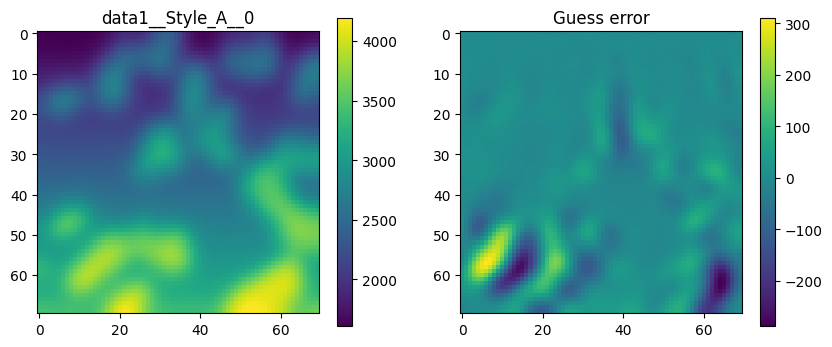

diag 1.9656961788752064e-05
False True
(4901, 1073)
(1073, 1)


C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\cupyx\scipy\sparse\linalg\_iterative.py:192: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ret = numpy.linalg.lstsq(cupy.asnumpy(H), e)


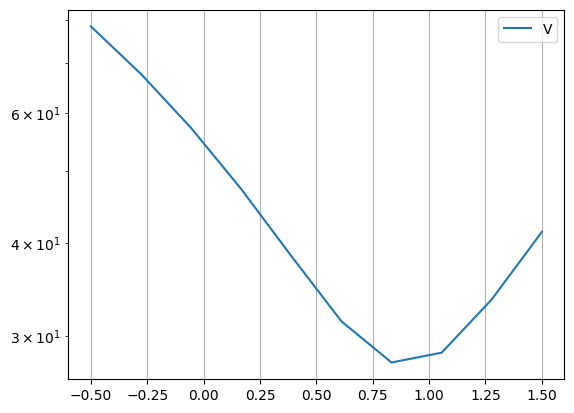

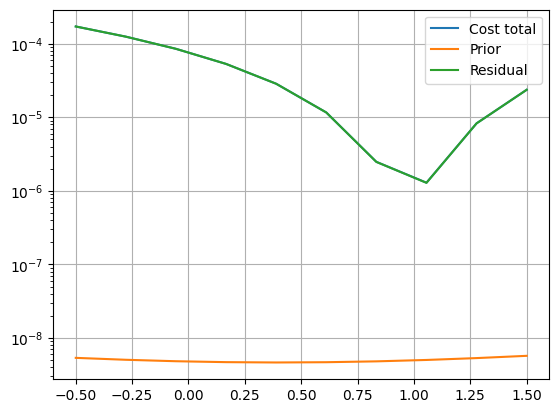

True True
(4901, 1073)
(1073, 1)


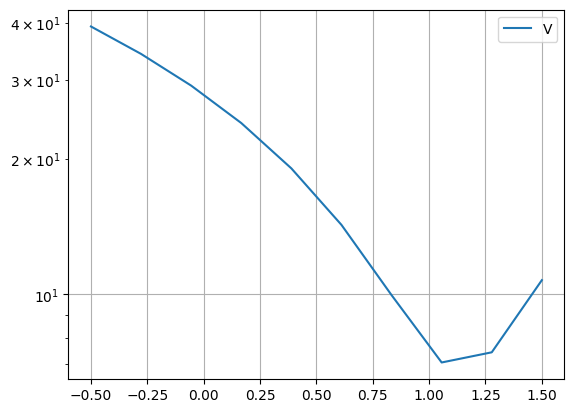

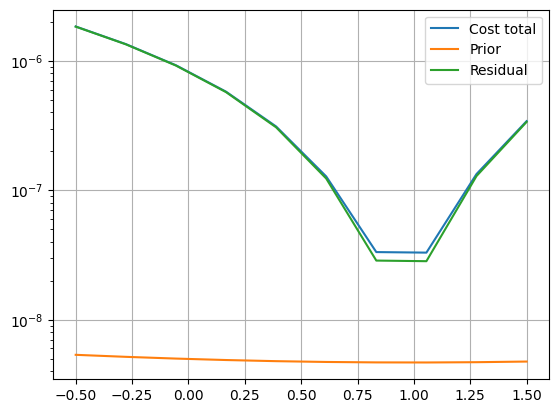

True True
(4901, 1073)
(1073, 1)


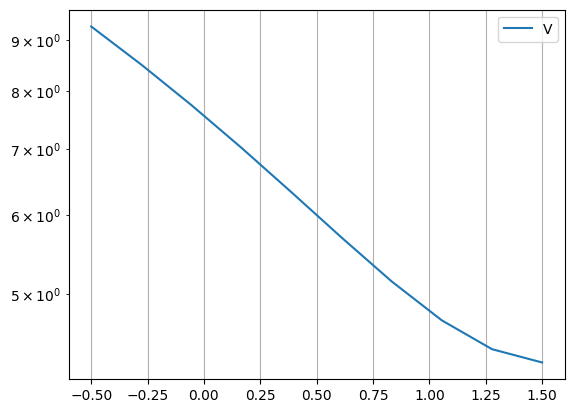

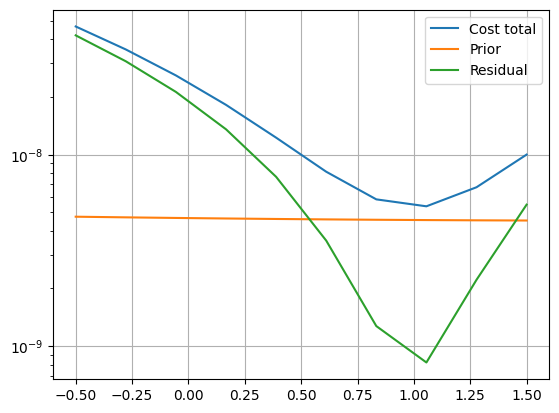

True True
(4901, 1073)
(1073, 1)


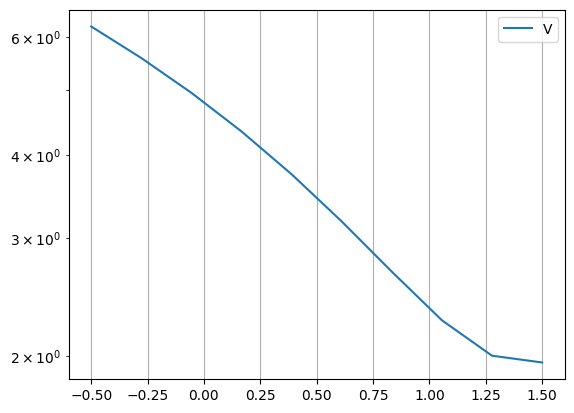

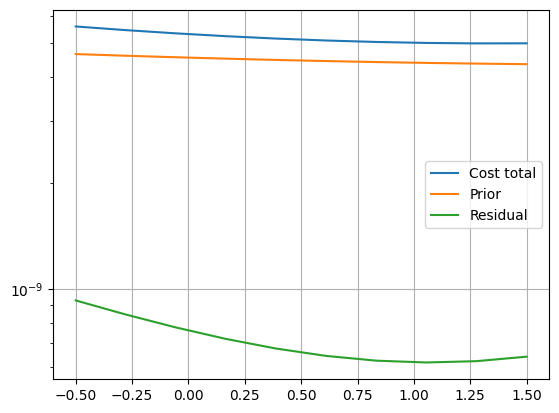

True True
(4901, 1073)
(1073, 1)


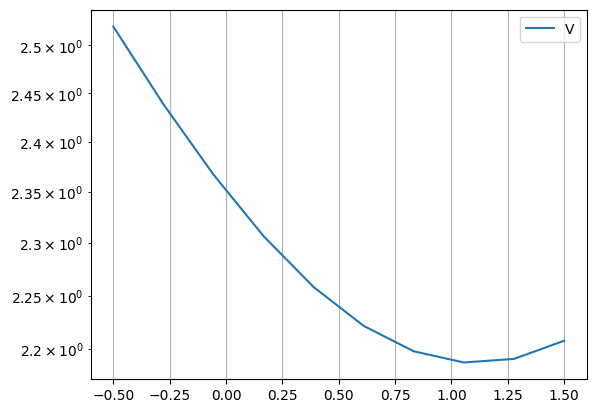

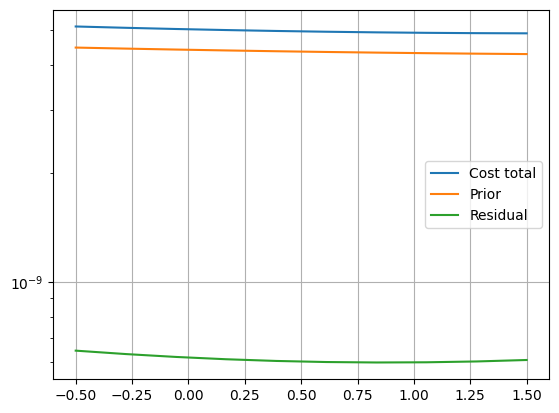

range:  -43.88611738132661 46.33673043250815


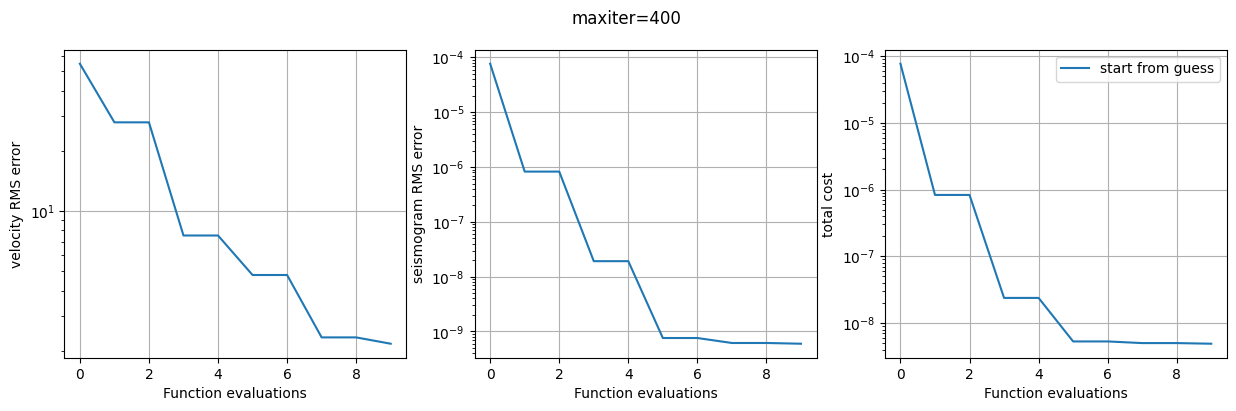

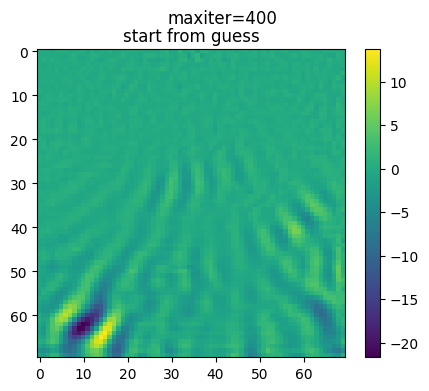

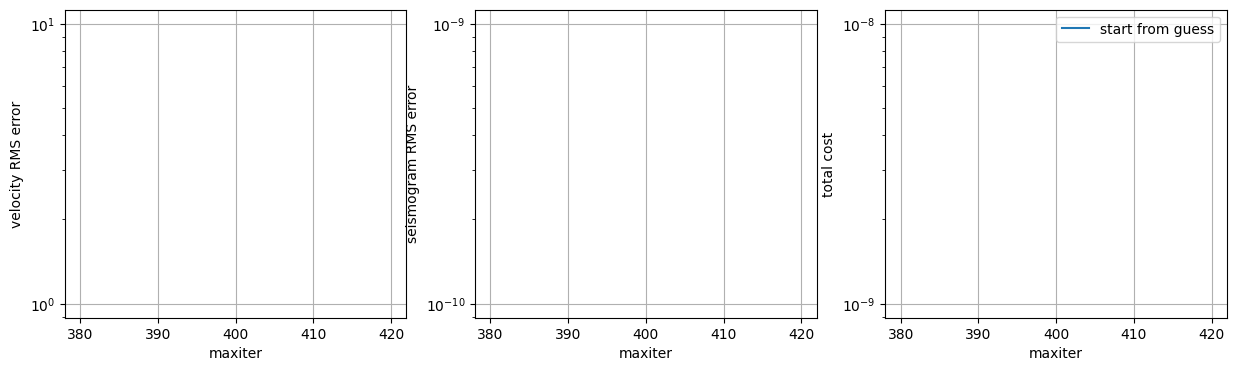

In [28]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_invert.InversionModel()
model.state = 1
model.maxiter = 1000
model.history_size = 10000
model.prior = seis_prior.SquaredExponential()
model.prior.transform = True
model.prior.svd_cutoff = 1.
model.prior.λ = 10**-11
model.do_gn=True
model.show_convergence=True
model.iter_outer=5
#model.prior.basis_functions()
#KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
#KK[-1,-1] = 10000.
#U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
#model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
#model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
#model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
#plt.figure()
#plt.imshow(cp.asnumpy(cp.log(cp.reshape(cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],(70,70)))/cp.log(10)))
#plt.colorbar()
#model.prior.use_full=True

do_which_list = [False,False,True]

def param_func(model,value):
    # if value==1:
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     model.prior.transform=False
    #     model.prior.basis_functions()
        
    #     #KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     #KK[-1,-1] = 10000.
    #     #U,s,_=cp.linalg.svd(model.prior.P+(1/model.prior.λ)*cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],compute_uv=True)
    #     U,s,_=cp.linalg.svd(cp.diag(cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ')))[:-1],compute_uv=True)
    #     model.prec_matrix = (U@cp.diag(1/cp.sqrt(s)))
    #     model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     model.prec_matrix[-1,-1] = 1.
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     # U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
    #     # model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
    #     # model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     # model.prec_matrix[-1,-1] = 1.
    # #model.prior.transform = value
    # if value==2:
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     model.prior.transform=False
    #     #model.prior.basis_functions()
        
    #     #KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     #KK[-1,-1] = 10000.
    #     #U,s,_=cp.linalg.svd(model.prior.P+(1/model.prior.λ)*cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],compute_uv=True)
    #     #U,s,_=cp.linalg.svd(cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],compute_uv=True)
    #     #model.prec_matrix = (U@cp.diag(1/cp.sqrt(s)))
    #     #model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     #model.prec_matrix[-1,-1] = 1.
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     # U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
    #     # model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
    #     # model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     # model.prec_matrix[-1,-1] = 1.
    model.maxiter = value
    return model
    
param_values = [400]
param_name = "maxiter"


for d in data[8000:8001]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)

In [26]:
%debug

> f:\seismic\code\core\seis_forward2.py(50)vel_to_seis()
     48     profile('start')
     49     assert vec.shape == (4901,1)
---> 50     assert vec_adjoint is None or vec_adjoint.shape == (5*999*70,1)
     51     assert vec_diff is None or vec_diff.shape == (4901,1)
     52     do_diff = not (vec_diff is None)



ipdb>  u


> f:\seismic\code\core\seis_invert.py(140)A()
    138         def A(x):
    139             x = x[:,None]
--> 140             v1 = seis_forward2.vel_to_seis(vec, vec_diff=basis_functions@x, vec_adjoint = rhs, adjoint_on_diff=True)[2]
    141             #v2 = seis_forward2.vel_to_seis(vec, vec_adjoint=v1)[2]
    142             res = np.concatenate( (self.prior.λ*self.prior.P@x[:-1,:],cp.zeros((1,1),dtype=kgs.base_type_gpu)),axis=0)+ basis_functions.T@v1/N



ipdb>  rhs.shape


(1073, 1)


ipdb>  q


In [ ]:
seis_forward2.show_profile(1)

In [10]:
results[0][0]

Data(is_train=True, family='Style_A', seismogram=Seismogram(filename='f:/seismic/data//train_samples\\Style_A/data/data1.npy', ind=0, data=None), velocity=Velocity(filename='f:/seismic/data//train_samples\\Style_A/model/model1.npy', ind=0, data=None, min_vel=array(1605.51403809)), velocity_guess=Velocity(filename=None, ind=None, data=array([[1613.24993631, 1612.12476573, 1610.82909258, ..., 1682.0129633 ,
        1695.80839364, 1704.23794003],
       [1616.58241949, 1615.39220027, 1613.77386219, ..., 1705.87337024,
        1723.79608357, 1732.86691626],
       [1623.29599836, 1622.52620803, 1619.91912845, ..., 1761.6569715 ,
        1782.96964391, 1794.95450503],
       ...,
       [3361.23543128, 3367.76148413, 3372.59080318, ..., 3457.97375837,
        3467.40164955, 3481.43527954],
       [3408.96088622, 3417.59647564, 3420.72986965, ..., 3509.06130618,
        3531.71875331, 3553.71487371],
       [3444.20702344, 3453.87293229, 3456.81051857, ..., 3547.35596415,
        3580.010640